In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [62]:
'''
path = '/kaggle/input/sports-balls-multiclass-image-classification/train/billiard_ball/billiard_ball_100.jpg'
image = Image.open(path).convert('RGB')
transform2 = transforms.Compose([
    transforms.ToTensor()
])
image = transform2(image)
image.shape
'''
# different start image size!

"\npath = '/kaggle/input/sports-balls-multiclass-image-classification/train/billiard_ball/billiard_ball_100.jpg'\nimage = Image.open(path).convert('RGB')\ntransform2 = transforms.Compose([\n    transforms.ToTensor()\n])\nimage = transform2(image)\nimage.shape\n"

In [63]:
import os
import torch
from torchvision import transforms
from PIL import Image

INPUT_SIZE = (128, 128)

train_dir = '/kaggle/input/sports-balls-multiclass-image-classification/train'
test_dir = '/kaggle/input/sports-balls-multiclass-image-classification/test'

transform = transforms.Compose([
    transforms.Resize(INPUT_SIZE),
    transforms.ToTensor()
])

CLASSES = 15
CLASSES_NAME = ['american', 'baseball', 'basketball', 'billiard', 'bowling', 'cricket', 'football', 'golf',
                'hockey_ball', 'hockey_puck', 'rugby', 'shuttlecock', 'table', 'tennis', 'volleyball']

def load_dataset(path):
    data = []
    labels = []
    for image_dir in os.listdir(path):
        #value = 0 # Добавлено для баланса классов
        for image_file in os.listdir(os.path.join(path, image_dir)):
            #print(image_file, end=' ')
            
            try:
                #if (value == 340): # Добавлено для баланса классов
                #    continue       # Добавлено для баланса классов
                img_path = os.path.join(path, image_dir, image_file)
                image = Image.open(img_path).convert('RGB')
                image = transform(image)
                data.append(image)
                
                name = image_file.split('_')[0]
                if name == 'hockey':
                    name = image_file.split('_')[0] + '_' + image_file.split('_')[1]
                    
                labels.append(CLASSES_NAME.index(name))
                #value += 1 # Добавлено для баланса классов
                

            except Exception as e:
                print(f"Failed to process {img_path}: {e}")
            
        print(image_dir)

    return torch.stack(data), torch.tensor(labels)

data, labels = load_dataset(train_dir)
data_test, labels_test = load_dataset(test_dir)

rugby_ball
hockey_ball
volleyball
golf_ball
football
shuttlecock
baseball
american_football
hockey_puck
table_tennis_ball
billiard_ball
bowling_ball
basketball
cricket_ball
tennis_ball
rugby_ball
hockey_ball
volleyball
golf_ball
football
shuttlecock
baseball
american_football
hockey_puck
table_tennis_ball
billiard_ball
bowling_ball
basketball
cricket_ball
tennis_ball


torch.Size([7328, 3, 128, 128])
torch.Size([7328])


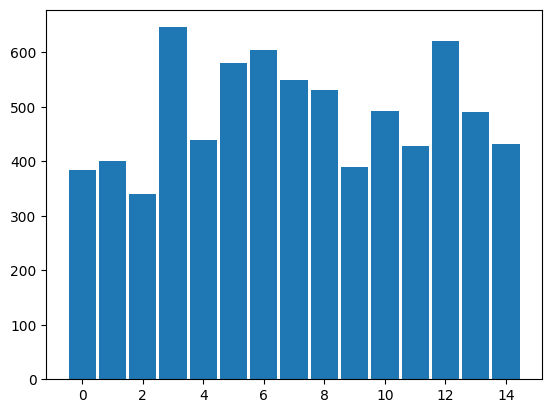

In [64]:
import matplotlib.pyplot as plt

print(data.shape)
print(labels.shape)

# print(data)
# print(labels)

plt.hist(labels, bins=range(CLASSES+1), align='left', rwidth=0.9);

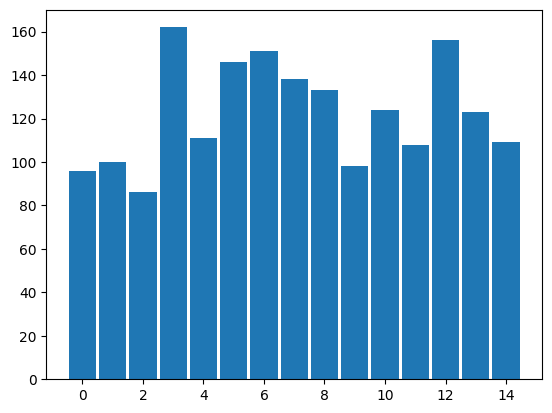

In [65]:
plt.hist(labels_test, bins=range(CLASSES+1), align='left', rwidth=0.9);

In [66]:
count2 = 0
count3 = 0
for i in range(len(labels)):
    if (labels[i] == 2):
        count2 += 1
    elif (labels[i] == 3):
        count3 += 1
print(count2, count3)

340 646


In [67]:
def init_weights(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)
    elif isinstance(m, nn.BatchNorm2d):
        nn.init.constant_(m.weight, 1)
        nn.init.constant_(m.bias, 0)
    elif isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
        nn.init.constant_(m.bias, 0)

In [68]:
import torch
from torchvision.transforms import functional, RandomResizedCrop, ColorJitter, RandomErasing
import random
import numpy as np
import matplotlib.pyplot as plt


def rotate_image(image):
    angle = np.random.randint(-30, 30)
    return functional.rotate(image, angle)


def blur_image(image):
    sigma = np.random.uniform(0.5, 1.5)
    return functional.gaussian_blur(image, kernel_size=[3, 3], sigma=sigma)


def flip(image):
    # return functional.hflip(image) if np.random.rand() < 0.5 else image
    return functional.hflip(image)


def color_jitter(image):
    transform = ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
    return transform(image)


def random_affine(image):
    return functional.affine(image,
                             angle=np.random.randint(-15, 15),
                             translate=(0.05, 0.05),
                             scale=np.random.uniform(0.9, 1.1),
                             shear=np.random.randint(-5, 5))


def random_erasing(image):
    transform = RandomErasing(p=0.5)
    return transform(image)


def add_noise(image):
    noise = torch.randn(image.size()) * 0.1
    return image + noise.clamp(0, 1)


def random_grayscale(image):
    return functional.rgb_to_grayscale(image, num_output_channels=3) if np.random.rand() < 0.3 else image


def apply_random_filters(image, probabilities=[0.3, 0.3, 0.2, 0.2],
                         print_filters: bool = False):
    
    augmentations = [rotate_image,
                    blur_image,
                    flip,
                    color_jitter,
                    random_affine,
                    random_erasing,
                    add_noise,
                    random_grayscale]
    num_filters = np.random.choice(range(len(probabilities)), p=probabilities)
    
    for _ in range(num_filters):
        func = random.choice(augmentations)
        image = func(image)
        if print_filters:
            print(func.__name__)
    return image


def show_random(data, lables, denorm: bool = True,
            probabilities=[0.3, 0.3, 0.2, 0.2], print_filters: bool = False):
    
    def preprocess(image):
        if denorm:
            image = (image + 1) / 2 * 255
        else:
            image *= 255
        image = image.int()
        image = image.numpy().transpose(1, 2, 0)
        return image

    _, axes = plt.subplots(1, 2)
    ri = np.random.randint(0, len(data))
    print(lables[ri].item())

    image = data[ri]
    
    axes[0].imshow(preprocess(image))
    axes[0].set_title('Image default')

    axes[1].imshow(preprocess(
                    apply_random_filters(
                        image, probabilities, print_filters)))
    axes[1].set_title('Image transformed')

    plt.show()

In [69]:
import torch.nn as nn

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsampling=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsampling
    
    def forward(self, x):
        residual = x
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out
    

In [70]:
# model     

class MyCNN(nn.Module):
    def __init__(self, classes):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=13, stride=2, dilation=3, padding=5)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True) # попробовать убрать inplace
        self.maxpool = nn.MaxPool2d(kernel_size=7, stride=1, padding=3)
        self.layer1 = ResidualBlock(64, 64)
        self.layer2 = ResidualBlock(64, 128, stride=2, 
                                    downsampling=nn.Sequential(nn.Conv2d(64, 128, kernel_size=1, stride=2), nn.BatchNorm2d(128)))
        self.layer3 = ResidualBlock(128, 256, stride=2,
                                   downsampling=nn.Sequential(nn.Conv2d(128, 256, kernel_size=1, stride=2), nn.BatchNorm2d(256)))
        self.layer4 = ResidualBlock(256, 512, stride=2,
                                   downsampling=nn.Sequential(nn.Conv2d(256, 512, kernel_size=1, stride=2), nn.BatchNorm2d(512)))
        # self.conv2 = nn.Conv2d(256, 512, kernel_size=4, stride=1, dilation=1, padding=2)
        self.conv2 = nn.Conv2d(512, 1024, kernel_size=4, stride=1, dilation=1, padding=2)
        #self.bn2 = nn.BatchNorm2d(512)
        self.bn2 = nn.BatchNorm2d(1024)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        # self.fc = nn.Linear(512, classes)
        self.fc = nn.Linear(1024, classes)
        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.dropout(x)
        x = self.layer2(x)
        x = self.dropout(x)
        x = self.layer3(x)
        x = self.dropout(x)
        x = self.layer4(x)
        x = self.dropout(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
    
raw_model = MyCNN(CLASSES)
raw_model.apply(init_weights)
print(raw_model)

MyCNN(
  (conv1): Conv2d(3, 64, kernel_size=(13, 13), stride=(2, 2), padding=(5, 5), dilation=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=7, stride=1, padding=3, dilation=1, ceil_mode=False)
  (layer1): ResidualBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): ResidualBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1,

Dataset

In [71]:
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.utils.data import Dataset

BATCH = 8

full_dataset = TensorDataset(data, labels)
test_dataset = TensorDataset(data_test, labels_test)

train_data = full_dataset
val_data = test_dataset

def transform_wrapper(image):
    return apply_random_filters(image, probabilities=[0.2, 0.26, 0.34, 0.2])

class CustomDataset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform
        
    def __len__(self):
        return len(self.subset)
    
    def __getitem__(self, idx):
        image, label = self.subset[idx]
        if self.transform:
            image = self.transform(image)
        return image, label
    
train_dataset = CustomDataset(train_data, transform=transform_wrapper)
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH, shuffle=True)

test_dataset = CustomDataset(val_data)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH, shuffle=False)

Train

In [72]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
# from sklearn.metrics import 
import time as T
from IPython import display
#from pynput.keyboard import Key, Listener
import torch
import matplotlib.pyplot as plt
import numpy as np
# from torcheval.metrics import MulticlassAccuracy



class DataCollector:
    def __init__(self, batches):
        self.count = 0
        self.losses = [0]
        self.labels = torch.Tensor()
        self.preds = torch.Tensor()
        self.batches = batches


    def batch(self, labels, outputs, loss):
        preds = torch.argmax(outputs, dim=1)
        self.losses[-1] *= self.count
        self.losses[-1] += loss
        self.count += 1
        self.losses[-1] /= self.count
        self.labels = torch.concat((self.labels, labels.cpu()))
        self.preds = self.preds.to('cpu')
        preds = preds.to('cpu')
        self.preds = torch.concat((self.preds, preds))

        if (self.count % 100 == 0):
            print(self.losses[-1])

    
    def epoch(self):
        self.labels = torch.Tensor()
        self.preds = torch.Tensor()
        self.losses.append(0)
        self.count = 0
    

    def precision_recall_f1(self):
        precision, recall, f1, _ = precision_recall_fscore_support(self.labels, self.preds)
        return precision, recall, f1


    def accuracy(self):
        return accuracy_score(self.labels, self.preds)


    def loss_data(self):
        return self.losses, np.arange(0, len(self.losses) / self.batches, 1 / self.batches)
        


class CallBack:
    def __init__(self, classes: int, train_batches: int, valid_batches: int):
        self.train = DataCollector(train_batches)
        self.valid = DataCollector(valid_batches)
        self.classes = classes
        self.time_point = T.time()


    def train_batch(self, labels, outputs, loss):
        self.train.batch(labels, outputs, loss)
    

    def valid_batch(self, labels, outputs, loss):
        self.valid.batch(labels, outputs, loss)
        

    def epoch(self):
        self.valid.epoch()
        self.train.epoch()


    def _plot_metrics(self, data: DataCollector, index):
        precision, recall, f1 = data.precision_recall_f1()
        self.axes[index].bar(range(self.classes), precision, label='Precision', width=0.3, align='edge')
        self.axes[index].bar(range(self.classes), recall, label='Recall', width=-0.3, align='edge')
        self.axes[index].bar(range(self.classes), f1, label='F1', width=0.3, align='center')
        self.axes[index].set_xlabel('Class')
        self.axes[index].set_ylabel('Metric')
        self.axes[index].legend()
    

    def plot(self,  valid_accuracy=True,
                    train_accuracy=True,
                    time=True,
                    valid_loss=True,
                    train_loss=True,
                    valid_metrics=False,
                    train_metrics=False):
        plt.cla()
        self.train.losses[0] = self.train.losses[1]
        self.valid.losses[0] = self.valid.losses[1]

        plots = 0
        plots = (valid_loss or train_loss) + valid_metrics + train_metrics

        fig, self.axes = plt.subplots(plots, 1, squeeze=False)
        fig.set_size_inches(8, 8 * plots)

        index = 0
        if valid_loss or train_loss:
            if train_loss:
                self.axes[index][0].plot(self.train.losses, label='Training loss')
            if valid_loss:
                self.axes[index][0].plot(self.valid.losses, label='Validation loss')

            self.axes[index][0].legend()
            self.axes[index][0].set_xlabel('Epoch')
            self.axes[index][0].set_ylabel('Loss')
            index += 1
 
        if valid_metrics:
            self._plot_metrics(self.valid, index)
            index += 1
        
        if train_metrics:
            self._plot_metrics(self.train, index)
            index += 1

        display.clear_output(wait=True)
        display.display(fig)
        plt.close(fig)

        if valid_accuracy:
            print("Validation accuracy: ", self.valid.accuracy())

            print(self.valid.labels)
            print(self.valid.preds)
            pass
        
        if train_accuracy:
            print("Train accuracy: ", self.train.accuracy())
            pass

        if time:
            print("Time = ", T.time() - self.time_point)
        
        precision, recall, f1 = self.train.precision_recall_f1()
        precision, recall, f1 = precision.sum()/len(precision), recall.sum()/len(recall), f1.sum()/len(f1)
        precision_test, recall_test, f1_test = self.valid.precision_recall_f1()
        precision_test, recall_test, f1_test = precision_test.sum()/len(precision_test), recall_test.sum()/len(recall_test), f1_test.sum()/len(f1_test)
        print("Train precision, recall, f1: ", precision, recall, f1)
        print("Test precision, recall, f1:", precision_test, recall_test, f1_test)


In [73]:

import torch

cuda = torch.device('cuda') 

def fit(model, train_dataset, valid_dataset,
        criterion, optimizer, epochs, classes,
        backup_path: str | None = None, stopper: bool = False):
    callback = CallBack(classes, len(train_dataset), len(valid_dataset))


    if stopper:
        stop = Stopper()

    for epoch in range(epochs):  # loop over the dataset multiple times
        callback.epoch()
        print("epoch", epoch)
        model.train()  # Set the model back to training mode
        for i, data in enumerate(train_dataset):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device=cuda), labels.to(device=cuda)
            # zero the parameter gradients
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            loss.to(device=cuda)
            optimizer.step()

            
            callback.train_batch(labels, outputs, loss.item())
        print("valid")
        with torch.no_grad():
            model.eval()  # Set the model to evaluation mode
            for data in valid_dataset:
                inputs, labels = data
                inputs, labels = inputs.to(cuda), labels.to(cuda)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                callback.valid_batch(labels, outputs, loss.item())

        if backup_path:
            torch.save(model.state_dict(), f'{backup_path}_epoch_{epoch}')
    
        callback.plot()
    
    print('Finished Training')

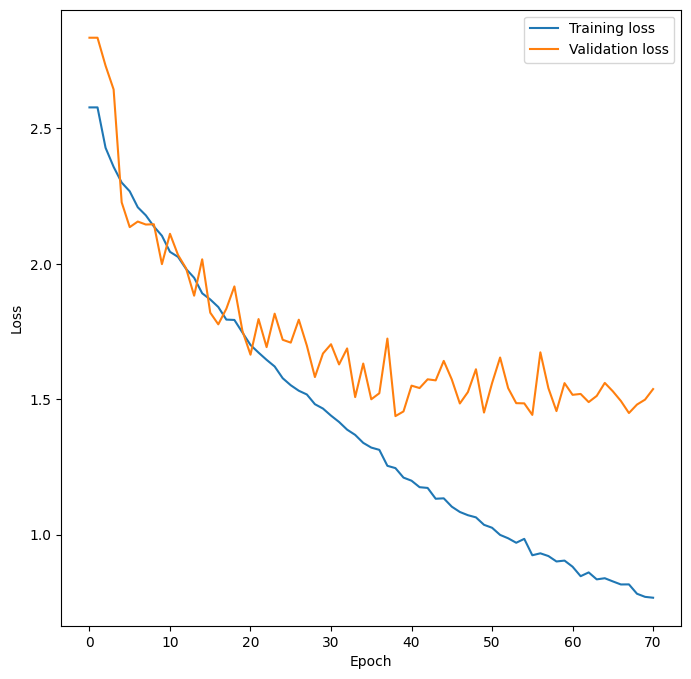

Validation accuracy:  0.6262900597501357
tensor([10., 10., 10.,  ..., 13., 13., 13.])
tensor([10., 10., 11.,  ...,  4., 13., 13.])
Train accuracy:  0.7742903930131004
Time =  2296.3396515846252
Train precision, recall, f1:  0.776570048053392 0.773867132862458 0.7750513854440073
Test precision, recall, f1: 0.6367061365147019 0.62393248048115 0.621453607067764
Finished Training


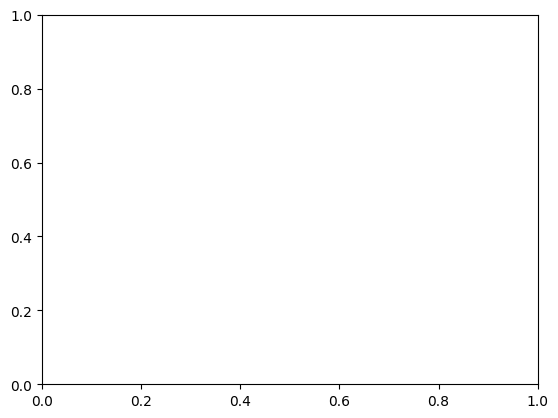

In [74]:
import torch.nn as nn
import torch.optim as optim

LR = 0.0002
EPOCH = 70

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(raw_model.parameters(), lr=LR)
model = raw_model.to(device=cuda)
fit(raw_model, train_loader, test_loader, criterion,
   optimizer, EPOCH, CLASSES, '/kaggle/working/residual_cnn_raw_model_1')
#fit(raw_model, train_loader, test_loader,
#    criterion, optimizer, EPOCH, CLASSES, 'backup/dogs_cats/residual_cnn_raw_model_1')

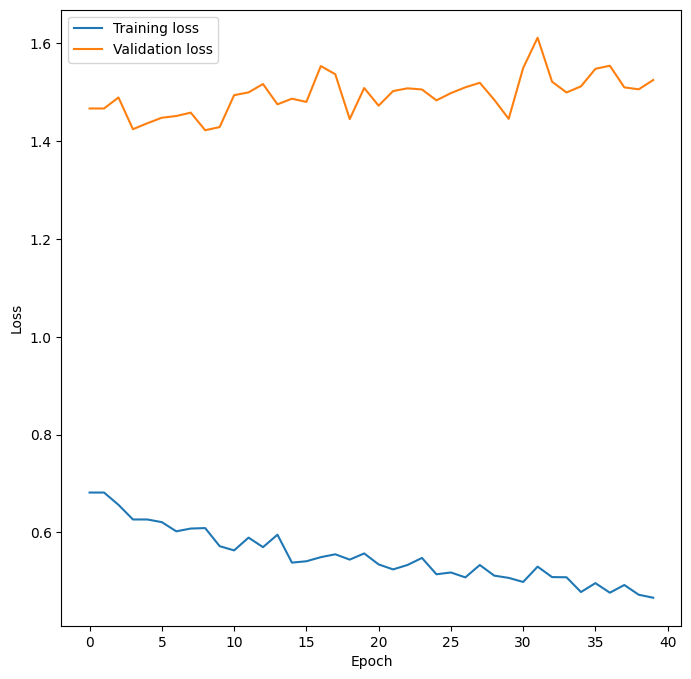

Validation accuracy:  0.6637696903856599
tensor([10., 10., 10.,  ..., 13., 13., 13.])
tensor([10., 10.,  5.,  ...,  4., 13., 13.])
Train accuracy:  0.8586244541484717
Time =  1229.6840031147003
Train precision, recall, f1:  0.8605944204687483 0.8589668453489188 0.859667283880663
Test precision, recall, f1: 0.6672478889288761 0.6592888662960051 0.6614855474720791
epoch 39
0.47742125898599624


In [ ]:
NEW_LR = 0.0001
raw_model2 = MyCNN(CLASSES)
model2=raw_model2.to(cuda)
model2.load_state_dict(torch.load('/kaggle/working/residual_cnn_raw_model_1_epoch_69'))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=NEW_LR)
fit(model2, train_loader, test_loader, criterion,
   optimizer, EPOCH, CLASSES, '/kaggle/working/residual_cnn_raw_model_2')